In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
import pickle

%matplotlib notebook

In [9]:
with open('/Users/vanessa/Downloads/x100_y100_t5000_ru1_rv05_f_055_k062.pkl', 'rb') as f:
  time_array = pickle.load(f)

distribution = time_array[:,:,:,1] #change in concentration of chemical V over time.

<IPython.core.display.Javascript object>


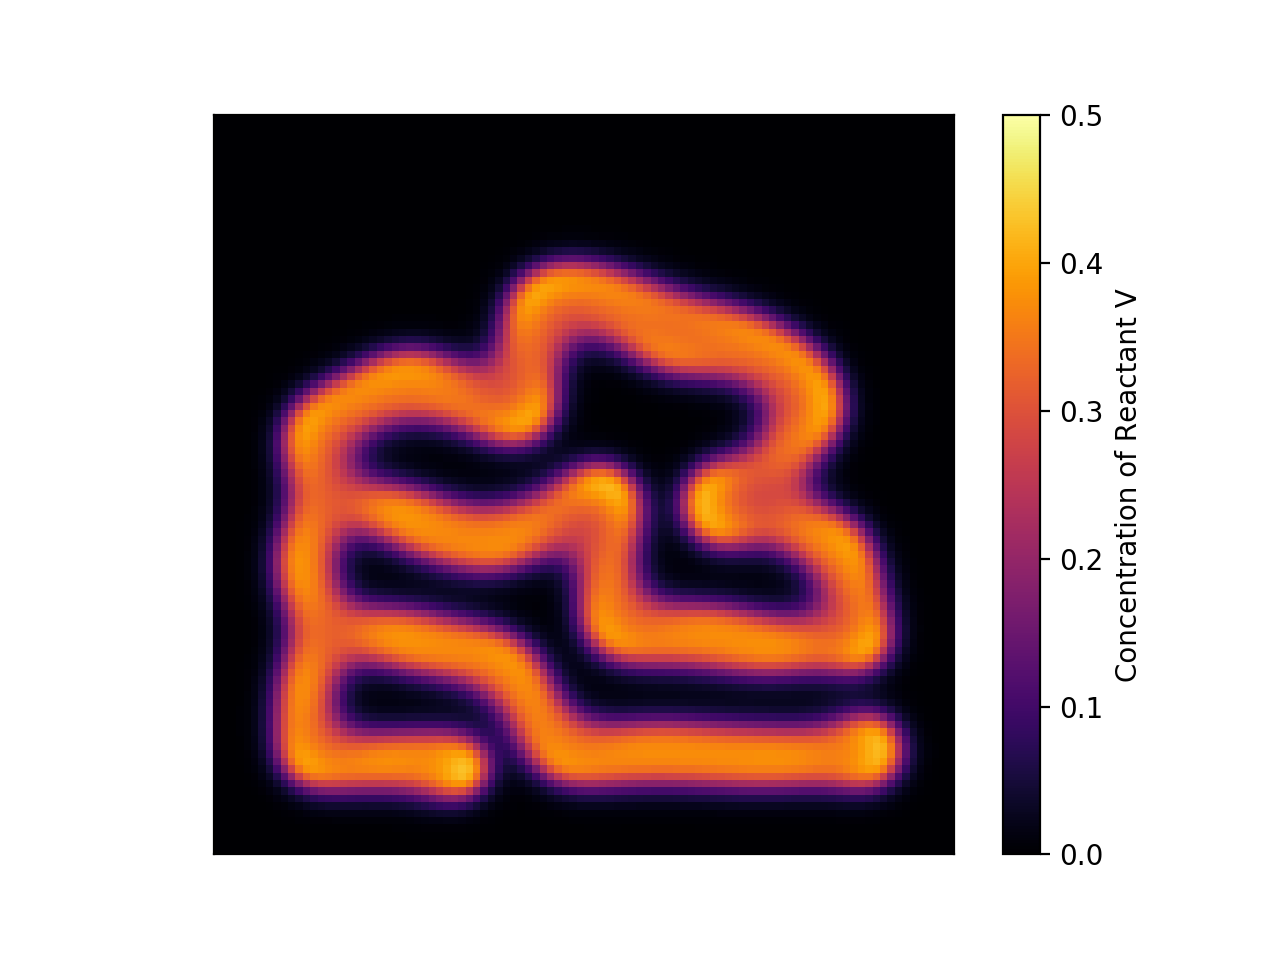

In [10]:
#Plotting:
fig, ax = plt.subplots()
image = ax.imshow(distribution[:,:,0], cmap='inferno',origin='lower',vmin=np.amin(distribution), vmax=np.amax(distribution)*0.5)
fig.colorbar(image, label='Concentration of Reactant V')
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False) #Remove x,y ticks

#Animating:
def update(frame):
    image.set_data(distribution[:,:,frame]) #Progress to next slice of distribution
    
frames = len(time_array[0,0])
fps = 30
animator = animation.FuncAnimation(fig, update, frames=frames, interval=1000/fps, repeat=True, cache_frame_data=False)
fileName = "diffusionReactionSim_"+str(frames)+"TimeSteps.gif"
animator.save(fileName, writer=animation.PillowWriter(fps=fps)) #Save function, as wanted on individual basis.
plt.show()